In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
data_1=pd.read_csv("/content/Admission_Predict.csv")
data_2=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [25]:
data_1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
data_2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [28]:
data_1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [29]:
data_1.duplicated().sum()

0

In [30]:
data_1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [31]:
data_1.drop('Serial No.', inplace = True, axis=1)

In [32]:
cols = data_1.columns
cols

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

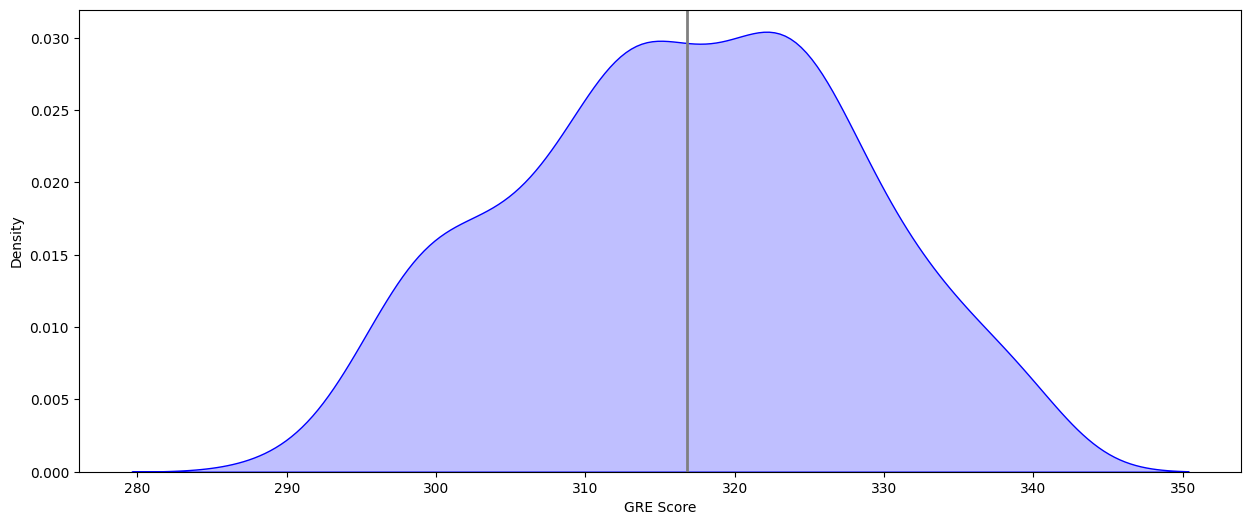

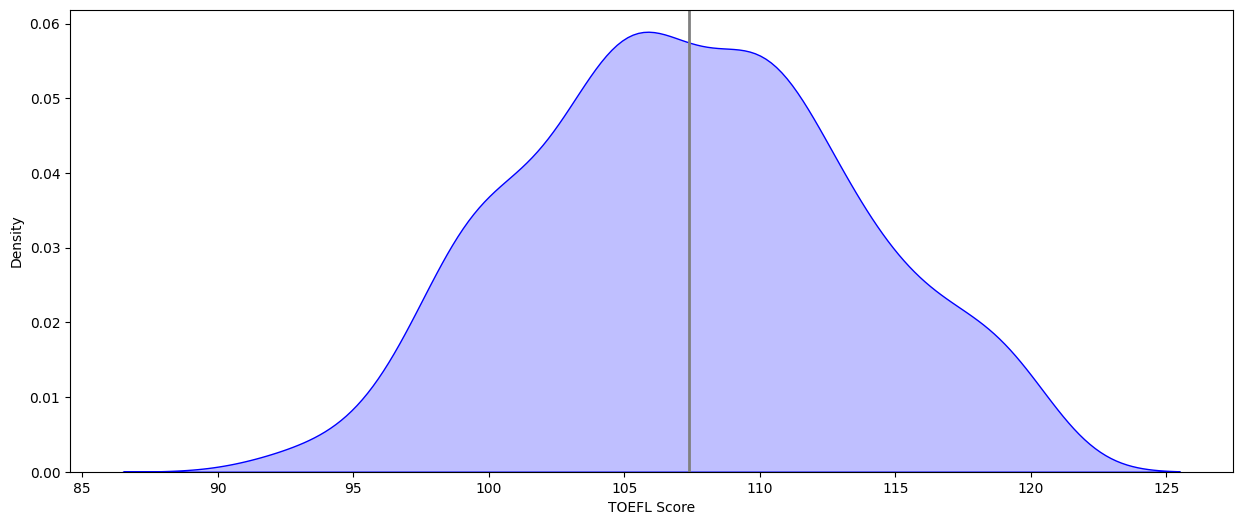

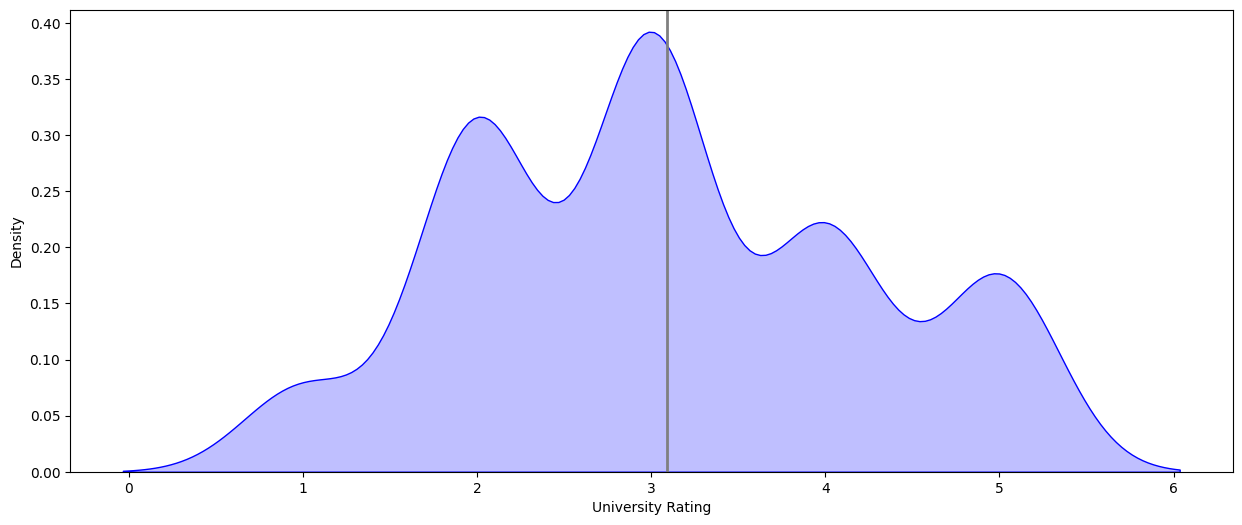

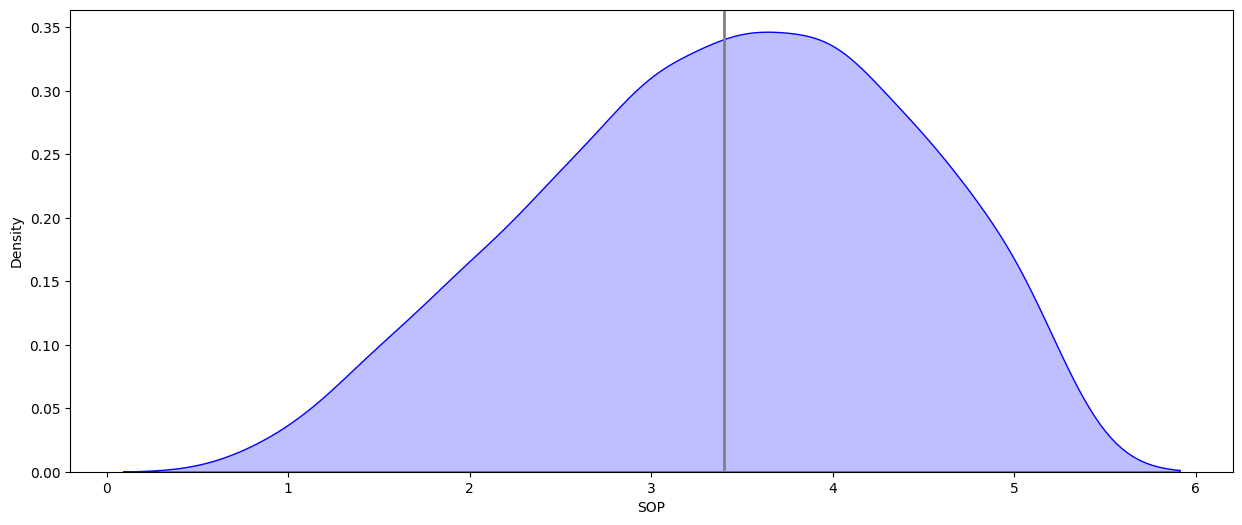

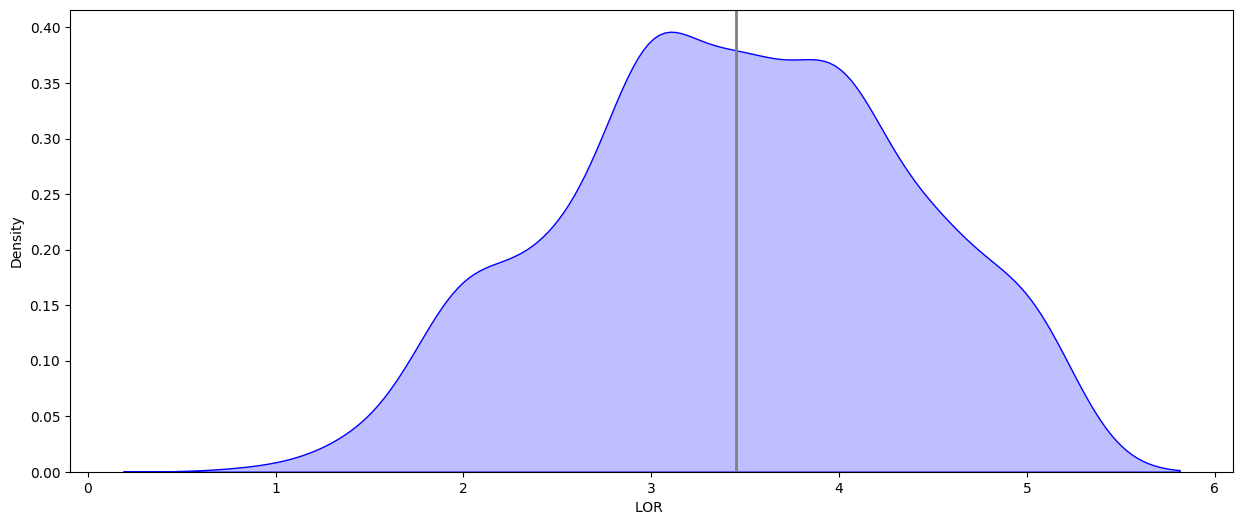

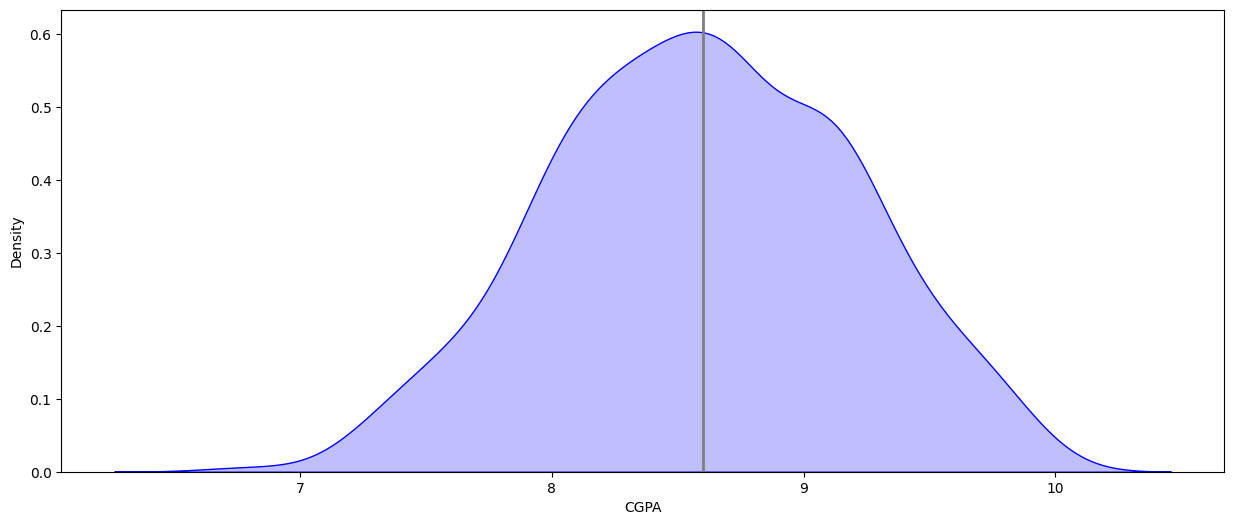

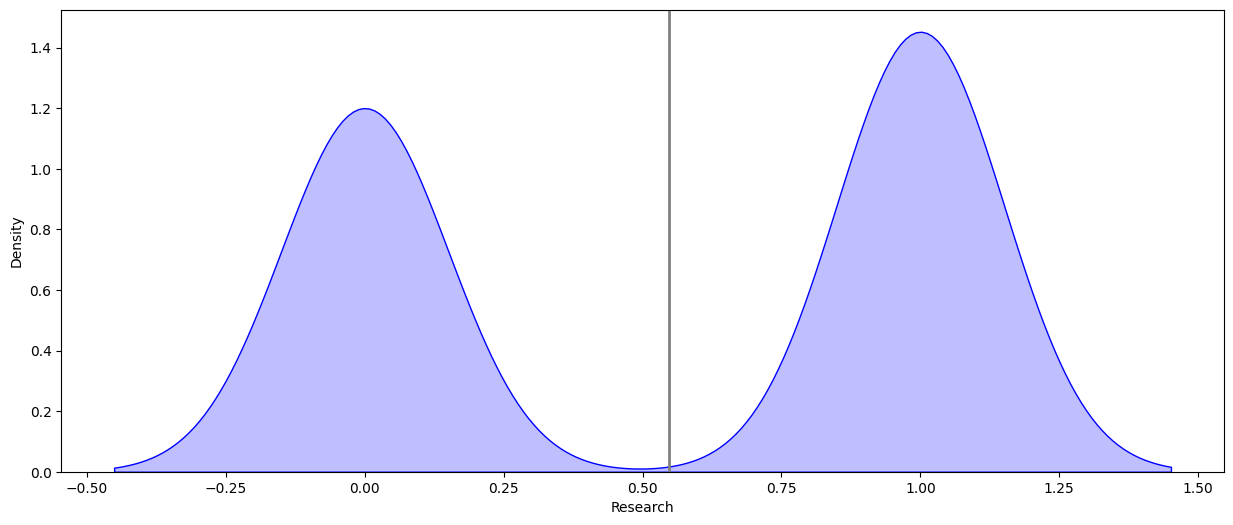

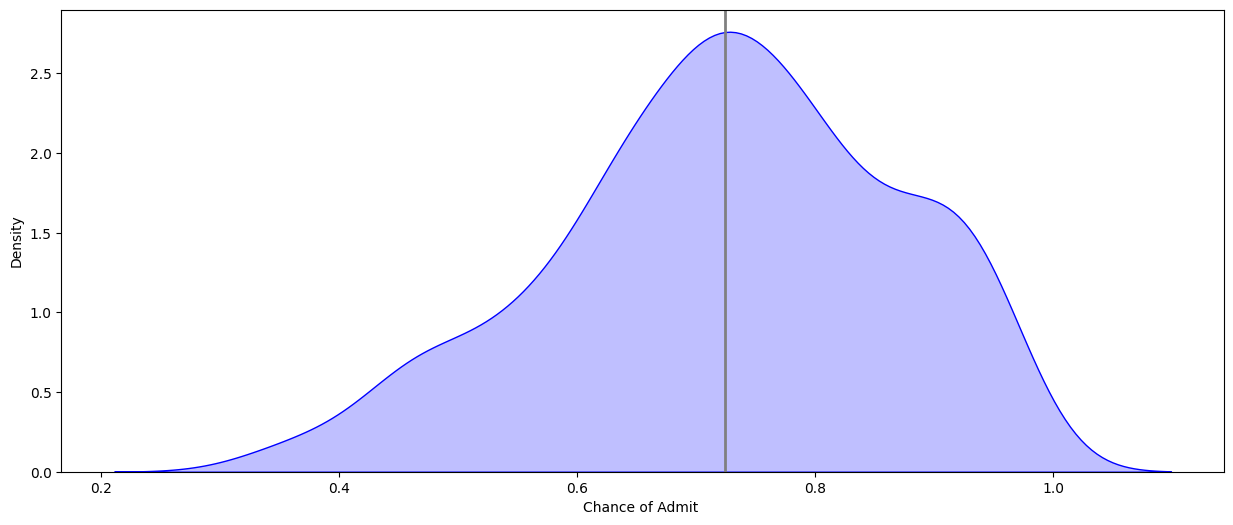

In [54]:
for n in cols :
  fig, ax = plt.subplots(1, 1, figsize=(15, 6))
  sns.kdeplot(data_1[n], color='blue', ax=ax, fill = True)
  ax.axvline(data_1[n].mean(), color='gray', linewidth=2)

  plt.show()

In [173]:
# The features aproxemitely follow the normal distribution so they don't have outlires

In [56]:
from scipy.stats import skew

skew_data = pd.DataFrame(data = cols, columns=['Features'])
skewness = []
for n in cols :
  skewness.append(skew(data_1[n]))

skew_data['Skewness'] = skewness
skew_data

,Features,Skewness
0,GRE Score,-0.062657
1,TOEFL Score,0.057001
2,University Rating,0.170617
3,SOP,-0.274726
4,LOR,-0.106590
5,CGPA,-0.065743
6,Research,-0.190863
7,Chance of Admit,-0.352121


In [57]:
ur = data_1['University Rating'].value_counts()
ur

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

In [58]:
sop = data_1['SOP'].value_counts()
sop

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

In [59]:
research = data_1['Research'].value_counts()
research

1    219
0    181
Name: Research, dtype: int64

In [60]:
lor = data_1['LOR '].value_counts()
lor

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR , dtype: int64

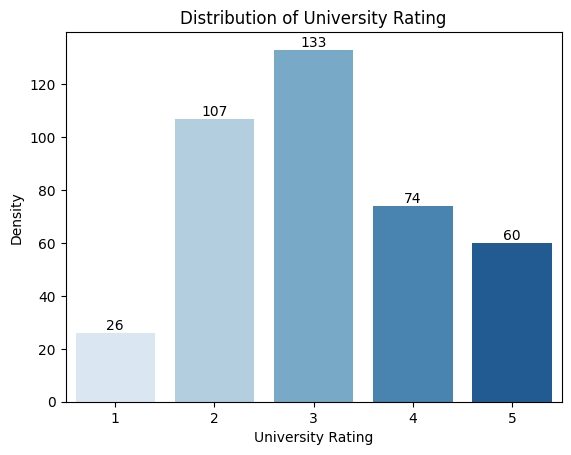

In [66]:
barplot = sns.barplot(x= ur.index , y= ur.tolist(), data=data_1, palette= 'Blues')
barplot.bar_label(barplot.containers[0])

plt.xlabel("University Rating")
plt.ylabel("Density")
plt.title("Distribution of University Rating")

plt.show()

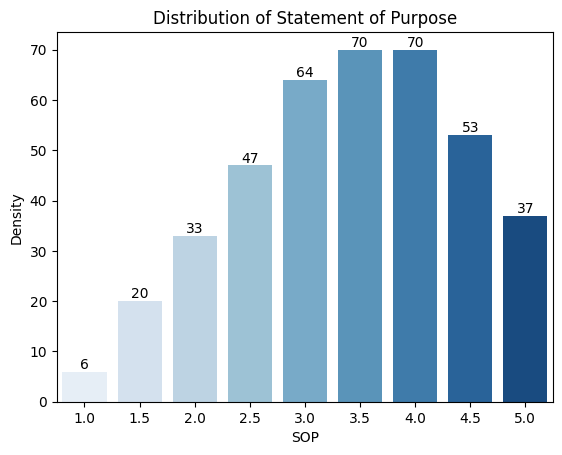

In [67]:
barplot = sns.barplot(x= sop.index , y= sop.tolist(), data=data_1, palette= 'Blues')
barplot.bar_label(barplot.containers[0])

plt.xlabel("SOP")
plt.ylabel("Density")
plt.title("Distribution of Statement of Purpose")

plt.show()

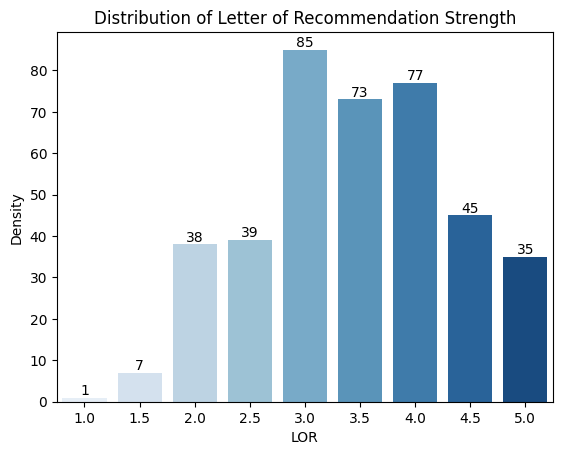

In [68]:
barplot= sns.barplot(x= lor.index , y= lor.tolist(), data=data_1, palette= 'Blues')
barplot.bar_label(barplot.containers[0])

plt.xlabel("LOR")
plt.ylabel("Density")
plt.title("Distribution of Letter of Recommendation Strength")

plt.show()

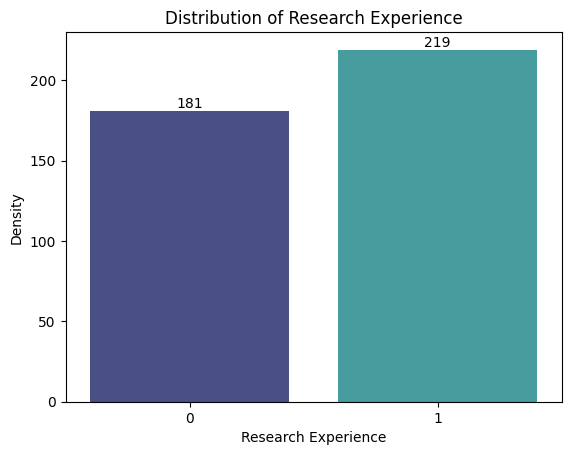

In [69]:
barplot = sns.barplot(x= research.index , y= research.tolist(), data=data_1, palette= 'mako')
barplot.bar_label(barplot.containers[0])

plt.xlabel("Research Experience")
plt.ylabel("Density")
plt.title("Distribution of Research Experience")

plt.show()

In [70]:
corr = data_1.corr()

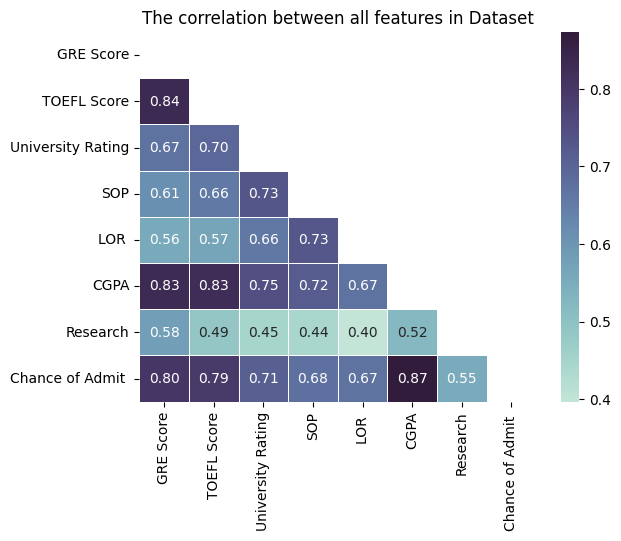

In [73]:
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, annot=True,linewidths=.5, fmt=".2f", cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), mask=dropSelf)

plt.title("The correlation between all features in Dataset")
plt.show()

**GRE Score Vs Chance Of Admit**

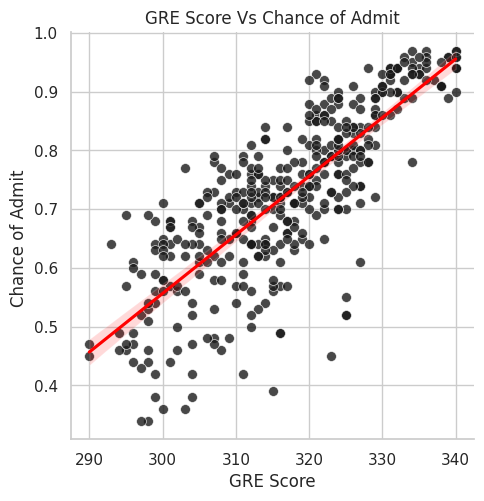

In [82]:
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(x='GRE Score', y='Chance of Admit ', data= data_1,
          scatter_kws={'s': 50, 'linewidth': 0.5, 'color' : 'k', 'edgecolor': 'w'},
          line_kws = {'color' : 'red'})

plt.title("GRE Score Vs Chance of Admit")
plt.show()

**TOEFL Score Vs Chance Of Admit**

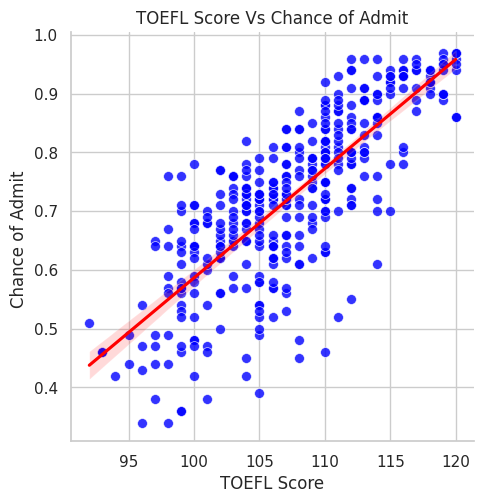

In [86]:
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(x='TOEFL Score', y='Chance of Admit ', data= data_1,
          scatter_kws={'s': 50, 'linewidth': 0.5, 'color' : 'blue', 'edgecolor': 'w'},
          line_kws = {'color' : 'red'})

plt.title("TOEFL Score Vs Chance of Admit")
plt.show()

**CGPA Vs Chance Of Admit**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


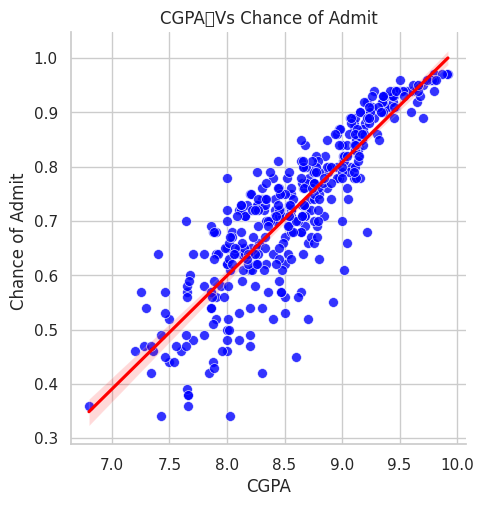

In [88]:
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(x='CGPA', y='Chance of Admit ', data= data_1,
          scatter_kws={'s': 50, 'linewidth': 0.5, 'color' : 'blue', 'edgecolor': 'w'},
          line_kws = {'color' : 'red'})

plt.title("CGPA	Vs Chance of Admit")
plt.show()

**SOP Vs Chance Of Admit**

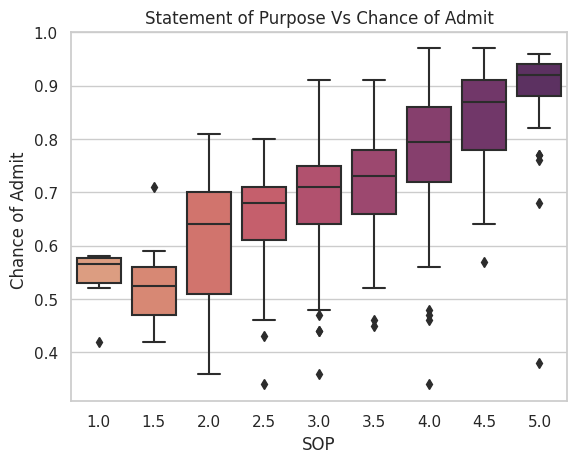

In [91]:
sns.boxplot(x= 'SOP', y='Chance of Admit ', data= data_1, palette = 'flare')

plt.title("Statement of Purpose Vs Chance of Admit")
plt.show()

**LOR Vs Chance Of Admit**

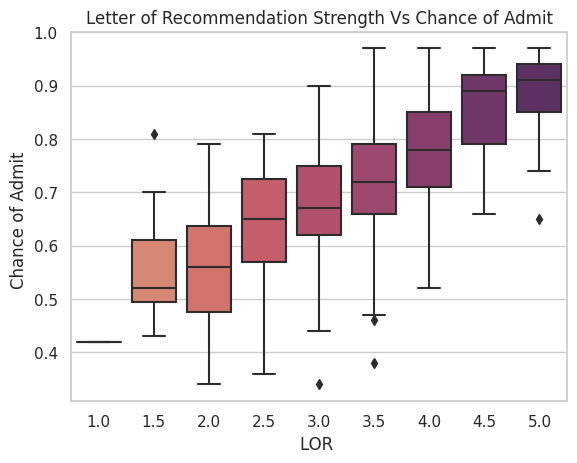

In [95]:
sns.boxplot(x= 'LOR ', y='Chance of Admit ', data= data_1, palette = 'flare')

plt.title("Letter of Recommendation Strength Vs Chance of Admit")
plt.show()

**Research Experience Vs Chance Of Admit**

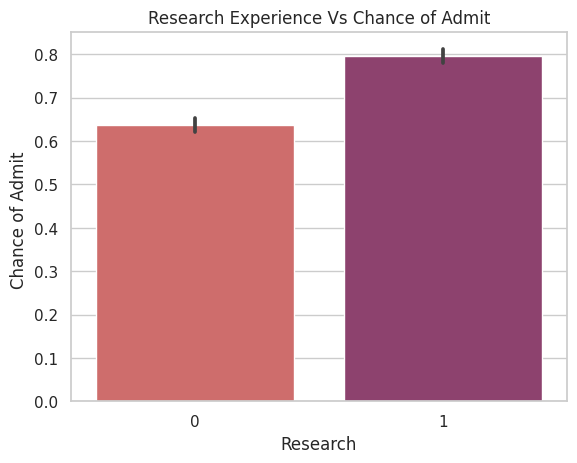

In [98]:
sns.barplot(x= 'Research', y= 'Chance of Admit ', data= data_1, estimator=np.mean, palette ='flare')

plt.title("Research Experience Vs Chance of Admit")
plt.show()

In [99]:
#Checking The Multicollinearity¶

In [100]:
data_1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [105]:
#Modling

In [113]:
X = data_1.drop(['Chance of Admit '], axis=1)
y = data_1['Chance of Admit ']

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [115]:
inputs_scaled = scaler.transform(X)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.25, random_state=123)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [119]:
models = [['Linear Regression :', LinearRegression()],
          ['DecisionTree :',DecisionTreeRegressor()],
          ['RandomForest :',RandomForestRegressor()],
          ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)]]

In [120]:
# Linear Regression

Linear Regression : 0.06420661071161245


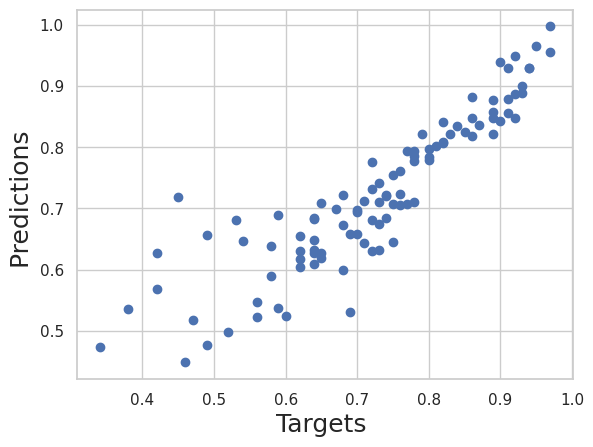

In [139]:
model = models[0][1]
name =  models[0][0]

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


plt.scatter(y_test, predictions)

plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)


plt.show()

Text(0.5, 1.0, 'Residuals PDF')

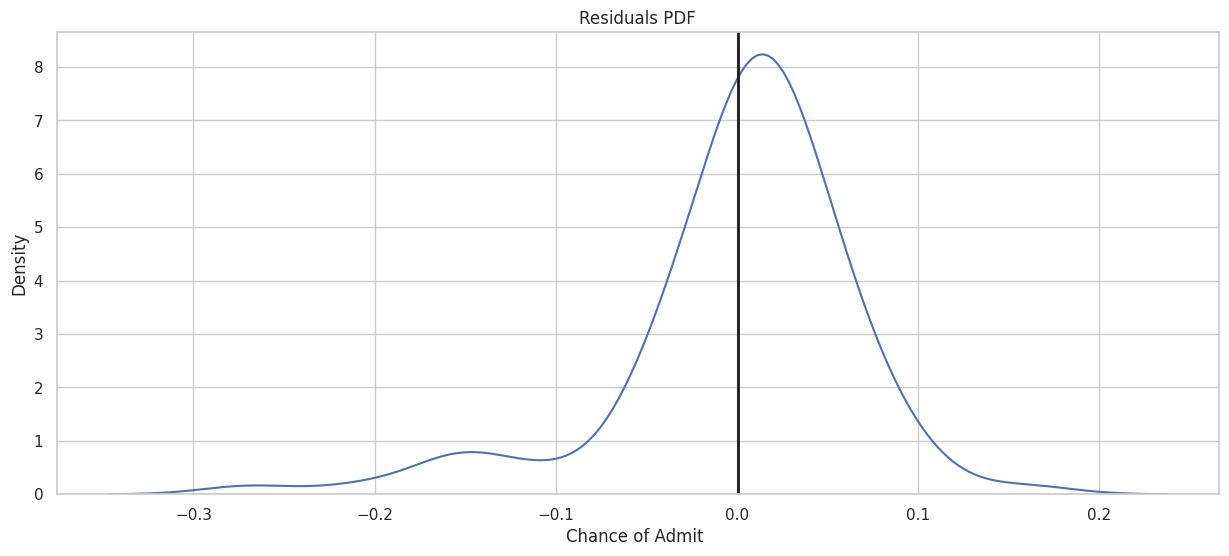

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color='k', linewidth=2)


# Include a title
plt.title("Residuals PDF")

In [141]:
model.score(X_test,y_test)

0.8021127142589853

In [142]:
df_reg = pd.DataFrame(predictions, columns=['Prediction'])
df_reg['Target'] = y_test
y_test = y_test.reset_index(drop=True)
df_reg['Target'] = y_test
df_reg['Residual'] = df_reg['Target'] - df_reg['Prediction']
df_reg['Difference%'] = np.absolute(df_reg['Residual']/df_reg['Target']*100)


pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_reg.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
50,0.76,0.76,-0.00,0.20
65,0.70,0.70,0.00,0.25
81,0.71,0.71,-0.00,0.25
86,0.78,0.78,0.00,0.28
49,0.80,0.80,0.00,0.34
34,0.62,0.62,0.00,0.50
71,0.75,0.75,-0.00,0.53
26,0.84,0.84,0.00,0.53
52,0.79,0.78,-0.01,0.67
5,0.69,0.70,0.01,0.82


In [143]:
# Decision Tree

DecisionTree : 0.09448809448814172


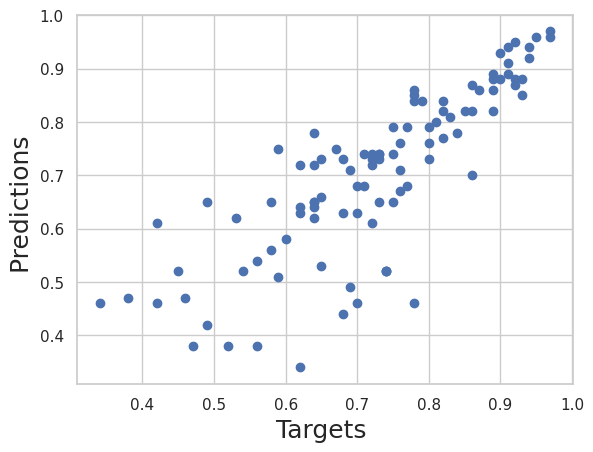

In [153]:
model = models[1][1]
name =  models[1][0]

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

plt.scatter(y_test, predictions)
plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)


plt.show()

Text(0.5, 1.0, 'Residuals PDF')

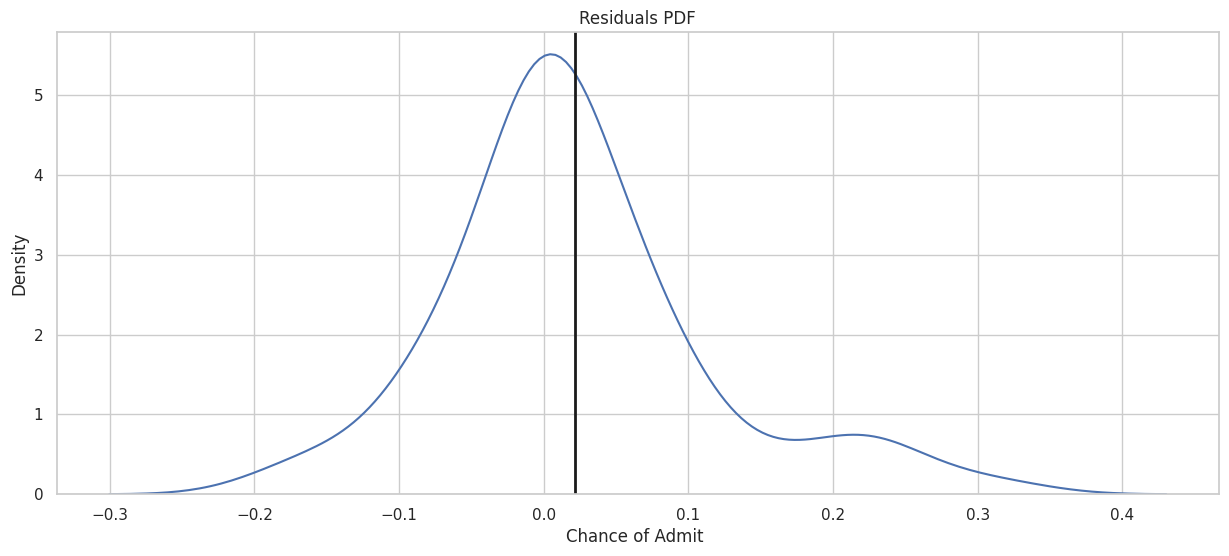

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color='k', linewidth=2)

plt.title("Residuals PDF")

In [155]:
model.score(X_test,y_test)

0.5714390632717807

In [156]:
# Random Forest

RandomForest : 0.07150635356386174


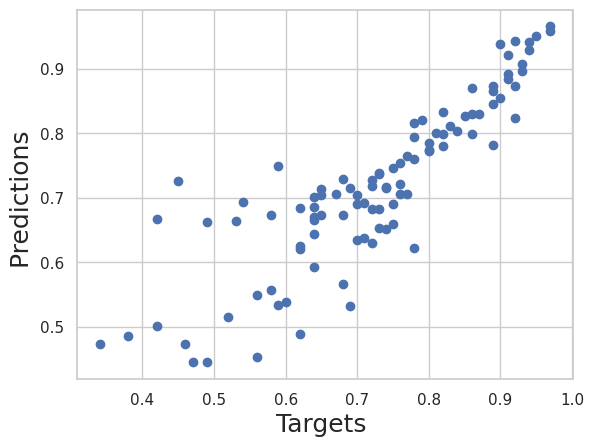

In [157]:
model = models[2][1]
name =  models[2][0]

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


plt.scatter(y_test, predictions)
# Let's also name the axes
plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

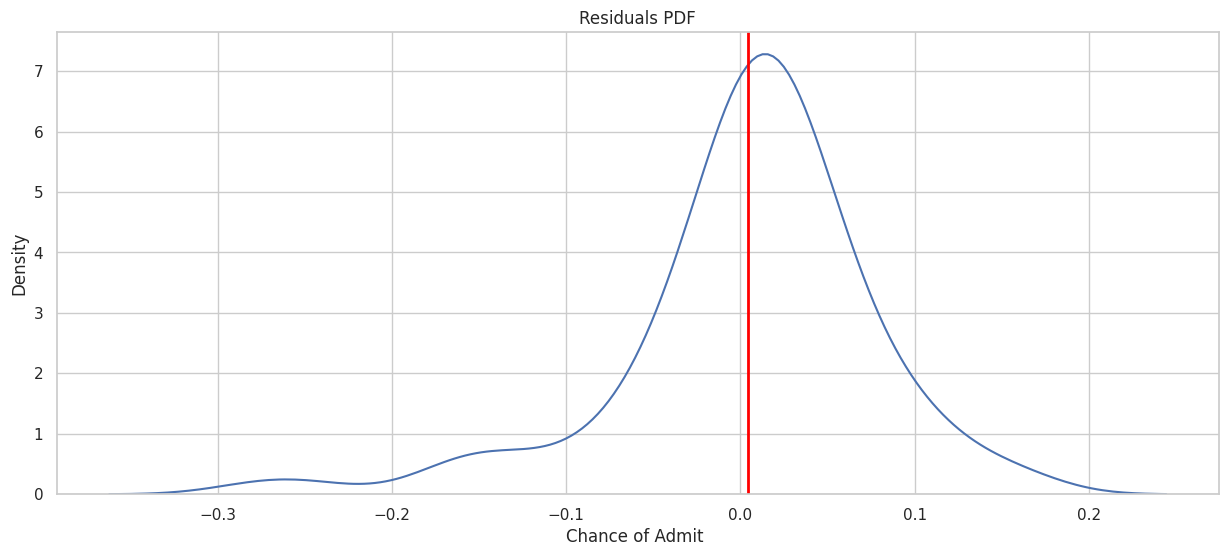

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color='red', linewidth=2)


plt.title("Residuals PDF")


In [159]:
model.score(X_test,y_test)

0.7545586873593243

In [160]:
#KNeighbours

KNeighbours : 0.06996248994997246


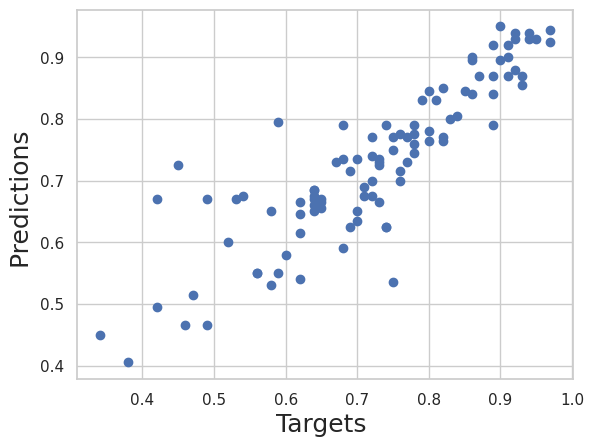

In [161]:
model = models[3][1]
name =  models[3][0]

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

plt.scatter(y_test, predictions)
# Let's also name the axes
plt.xlabel('Targets ',size=18)
plt.ylabel('Predictions ',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

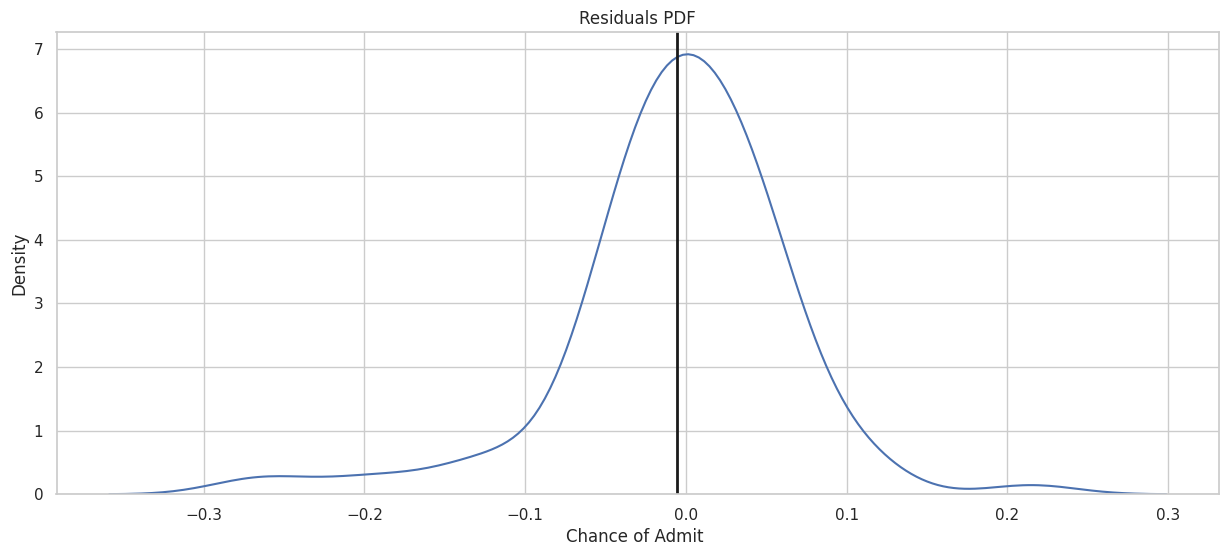

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(y_test - predictions)
ax.axvline((y_test - predictions).mean(), color='k', linewidth=2)


# Include a title
plt.title("Residuals PDF")

In [164]:
model.score(X_test,y_test)

0.7650427144880767

In [ ]:
#Best Model is Linear Regression